In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # import


import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'C:\Users\hites\Downloads\avocado.csv')

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


As we can observe that our dataset is quite favorable with 18249 complete entries and 14 columns, and a noteworthy aspect is the absence of any missing values. Moving forward, let's delve into feature engineering specifically focused on the 'Date' feature during the pre-processing stage.

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [356]:
df.shape

(18249, 14)

In [9]:
#option to generate descriptive statistics for all columns
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can observe that all columns having count 18249. Looks like it doesn't contain missing values

In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that no missing values exist in dataset.

As we know that the Dtype of date is object here so we have to convert into datetype.


In [11]:
#Extract the Month from DOB into separate column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [12]:
#Extract the Date from DOB into separate column
df['Date'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int64  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
 14  Month         18249 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 2.1+ MB


In [14]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it now.

In [15]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [17]:
df.shape

(18249, 14)

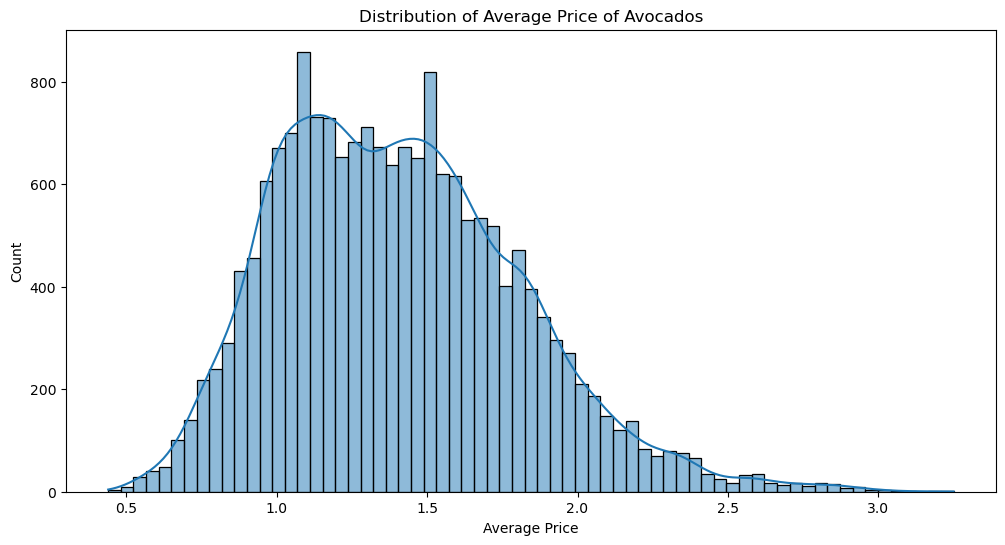

In [18]:
# Average Price
plt.figure(figsize=(12, 6))
sns.histplot(df['AveragePrice'], kde=True)
plt.title('Distribution of Average Price of Avocados')
plt.xlabel('Average Price')
plt.show()

Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.

In [19]:
mean_prices_by_year = df[df['type'] == 'organic'].groupby('year')['AveragePrice'].mean()

# Print or display the result
print(mean_prices_by_year)

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64


As we see that the average price of the avacado in different year. The highest most in year 2017 1.73

In [20]:
#now lets find how much type of avacado is sell in last 4 years.
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

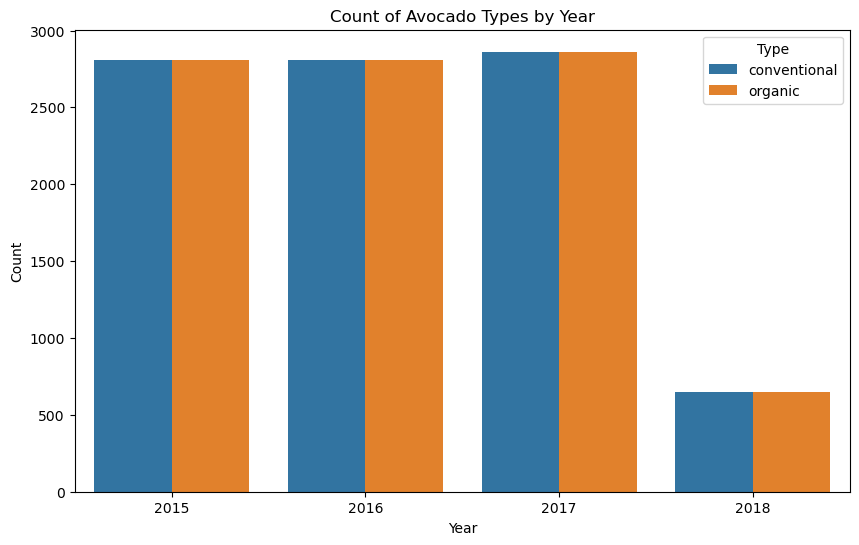

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='type', data=df)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Avocado Types by Year')
plt.legend(title='Type')
plt.show()

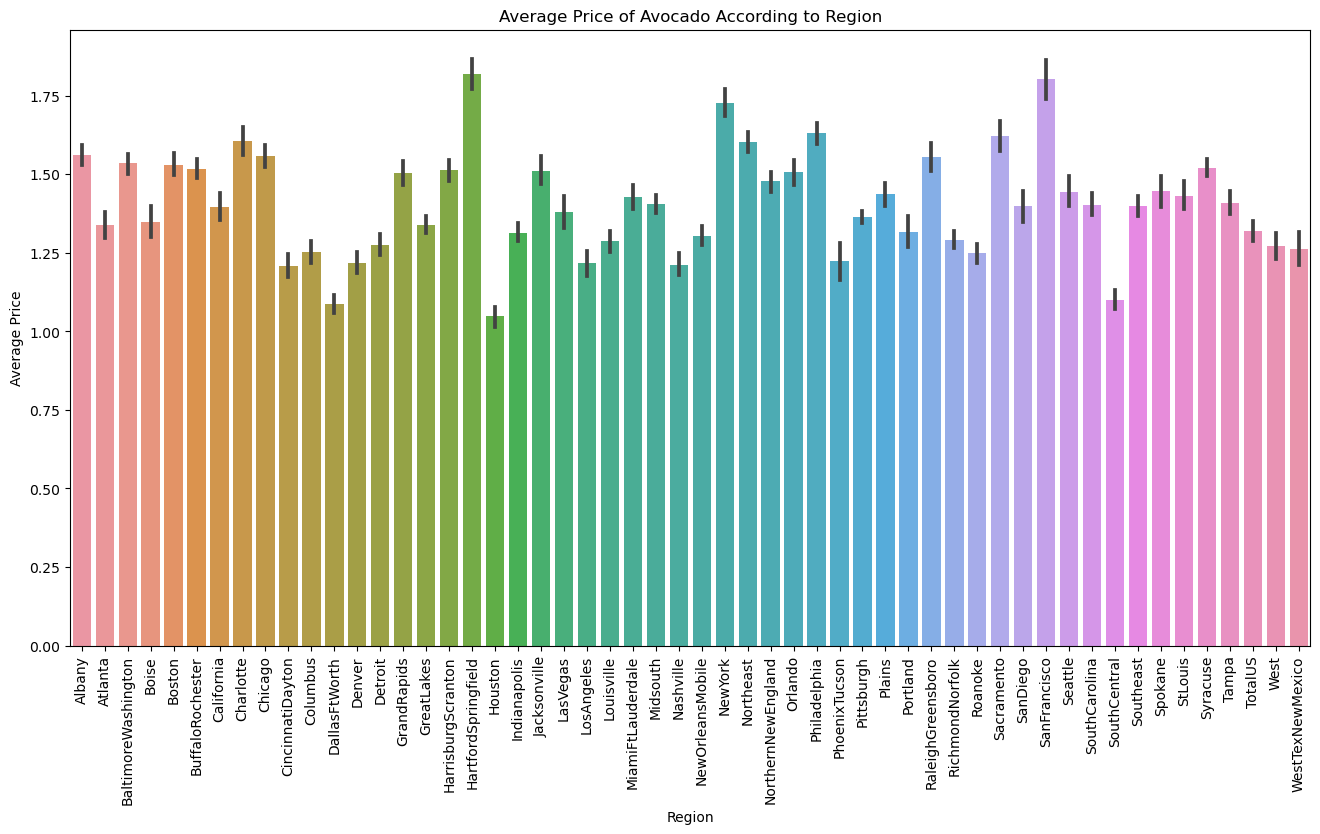

In [22]:
plt.figure(figsize=(16, 8))
sns.barplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')
plt.show()

Looks like these region are where price is very high.

HartfordSpringfield,
SanFrancisco,
NewYork,
Philadelphia,
Sacramento

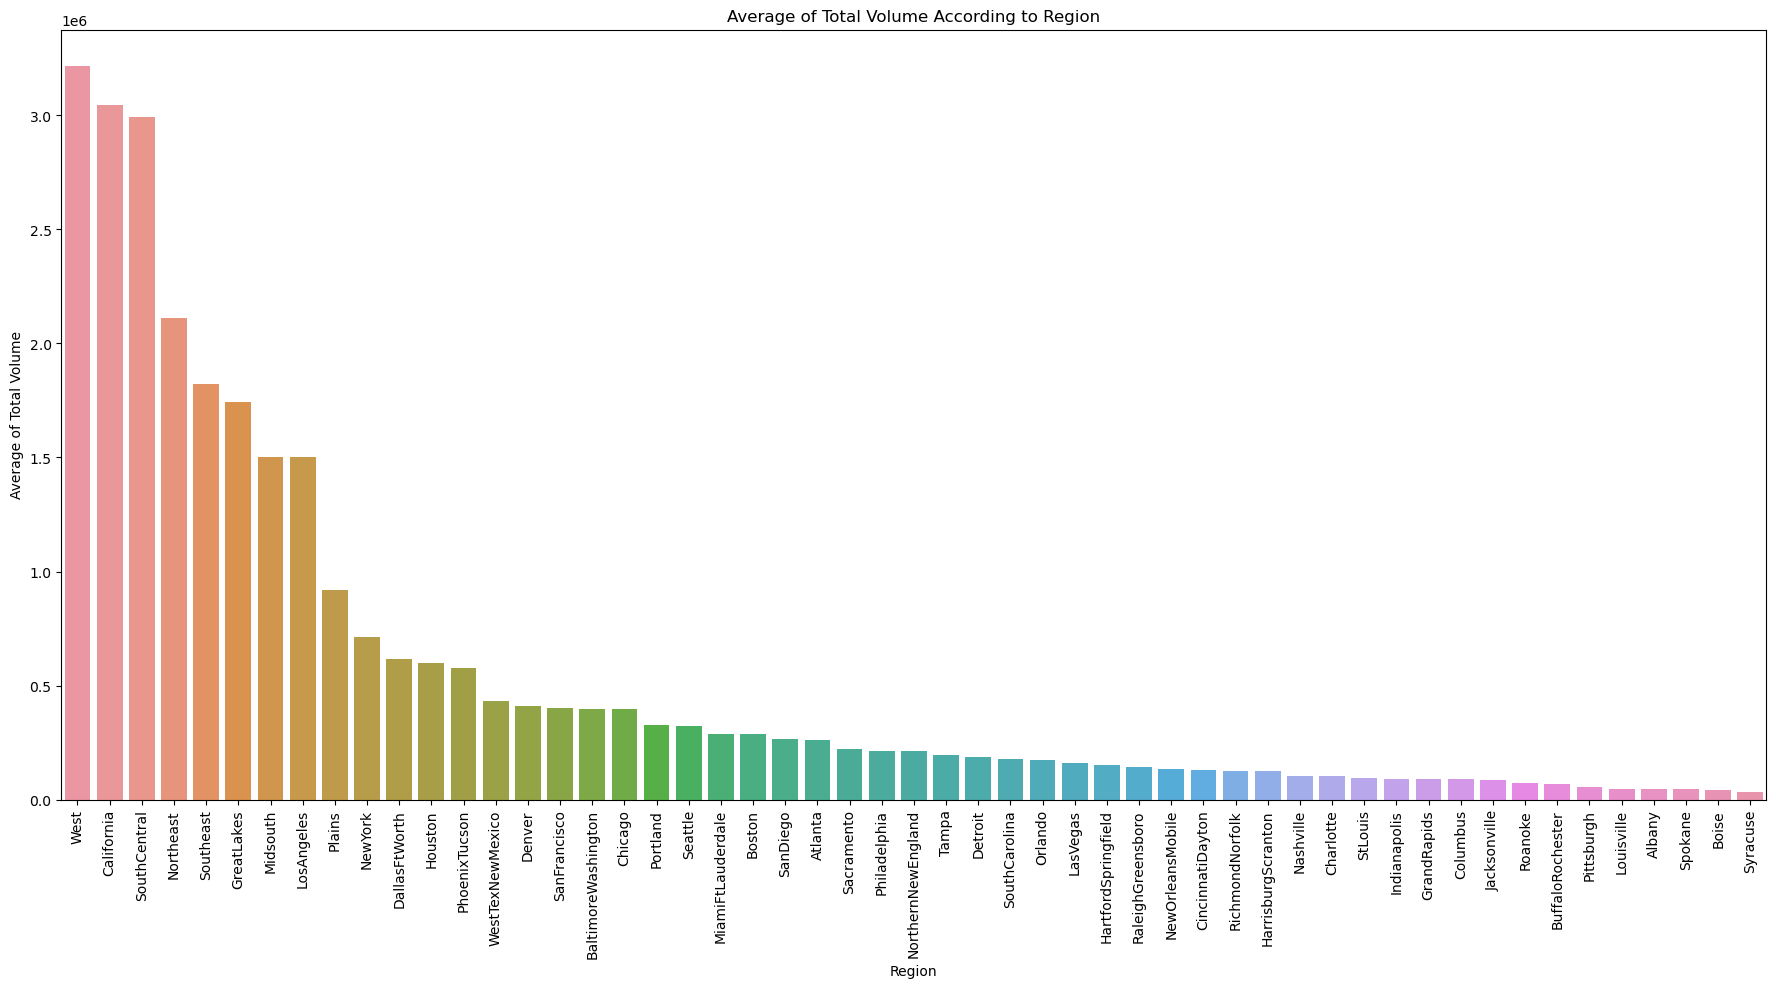

In [23]:
filter1 = df['region'] != 'TotalUS'
df1 = df[filter1]

region_list = list(df1['region'].unique())
average_total_volume = []

for region in region_list:
    filtered_data = df1[df1['region'] == region]
    average_total_volume.append(filtered_data['Total Volume'].mean())

df3 = pd.DataFrame({'region_list': region_list, 'average_total_volume': average_total_volume})

new_index = df3['average_total_volume'].sort_values(ascending=False).index.values
sorted_data1 = df3.reindex(new_index)

plt.figure(figsize=(22, 10))
ax = sns.barplot(x=sorted_data1['region_list'], y=sorted_data1['average_total_volume'])

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')
plt.show()


Looks like these region are where Consumption is very high.
West,
California,
SouthCentral,
Northeast,
Southeast,


Text(0.5, 1.0, 'Average Price')

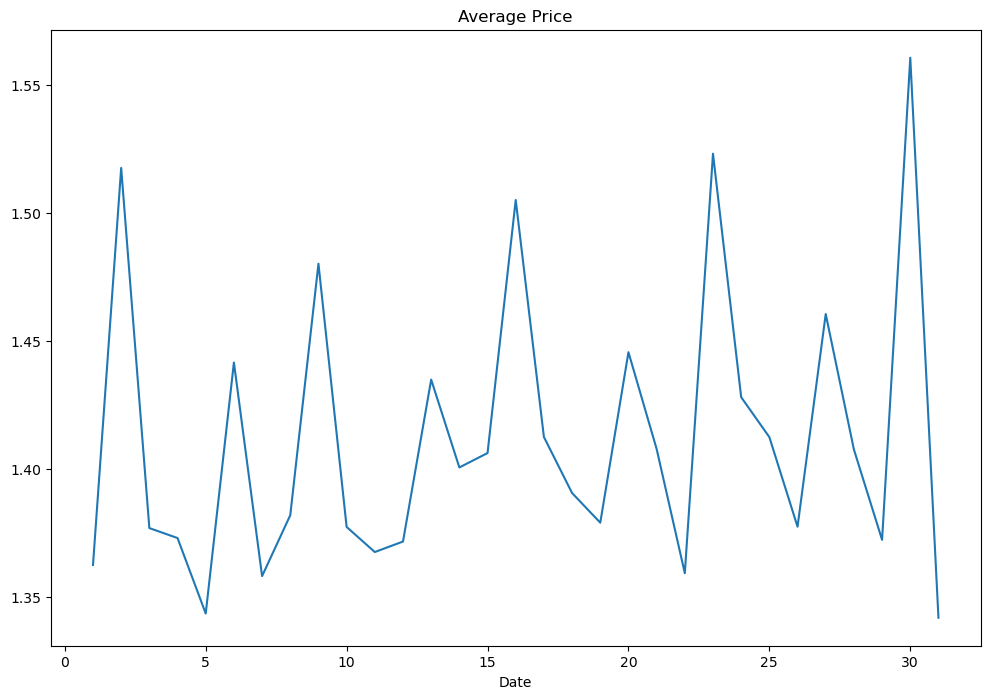

In [24]:
#Average price of avocado by date

byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

above is showing on date 28,29 and 30 the price of avacado is high

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

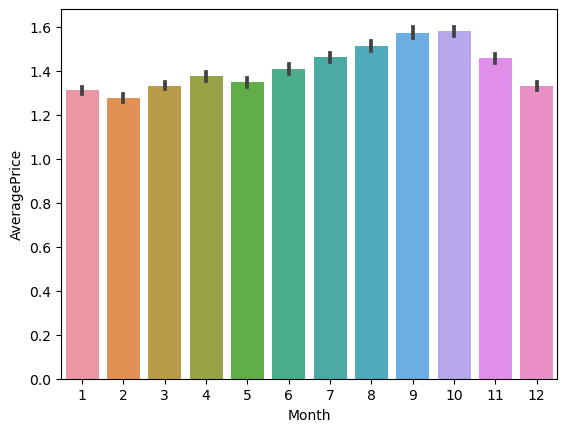

In [25]:
sns.barplot(x="Month",y ="AveragePrice", data=df)

Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.
September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.

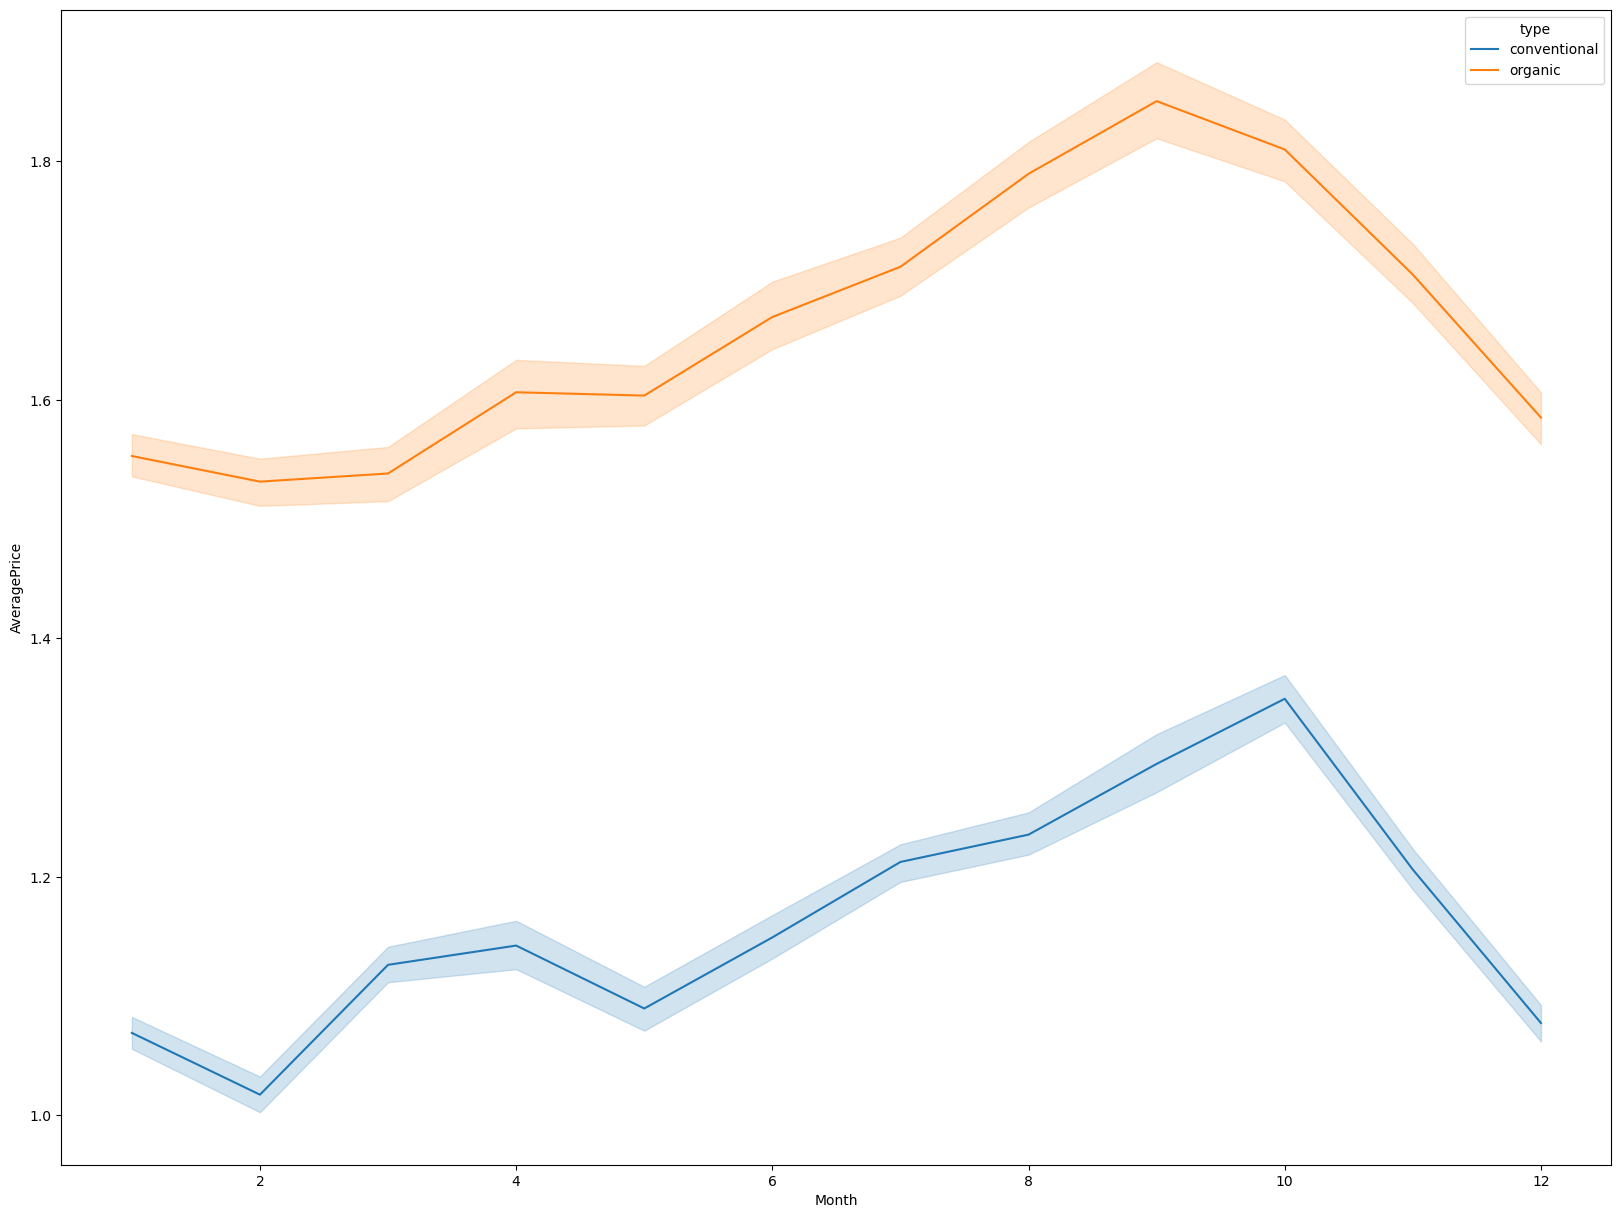

In [26]:
plt.figure(figsize=(20,15))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

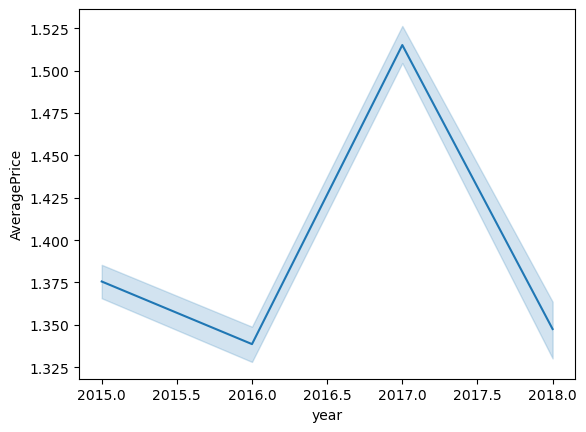

In [27]:
sns.lineplot(x = 'year', y = 'AveragePrice', data=df)

This also shows there was a huge hike in prices after July 2017 and before Jan 2018. This was also confirmed in earlier graph too.

Text(0.5, 1.0, 'Average_Price')

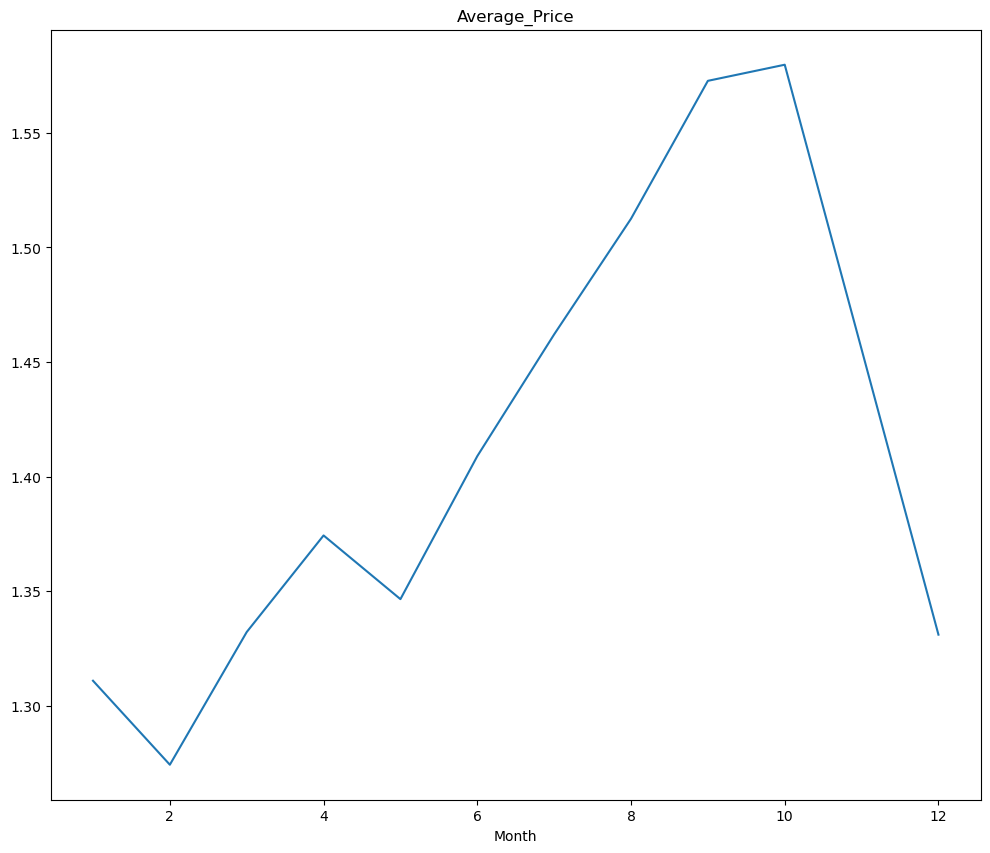

In [28]:
month=df.groupby('Month').mean()
plt.figure(figsize=(12,10))
month['AveragePrice'].plot()
plt.title('Average_Price')

In [29]:
#checking the value counts of each type
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [30]:
#co relation of total volume to total bag
df[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


in between august to october the price of avacado is much higher as comapared to other months

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

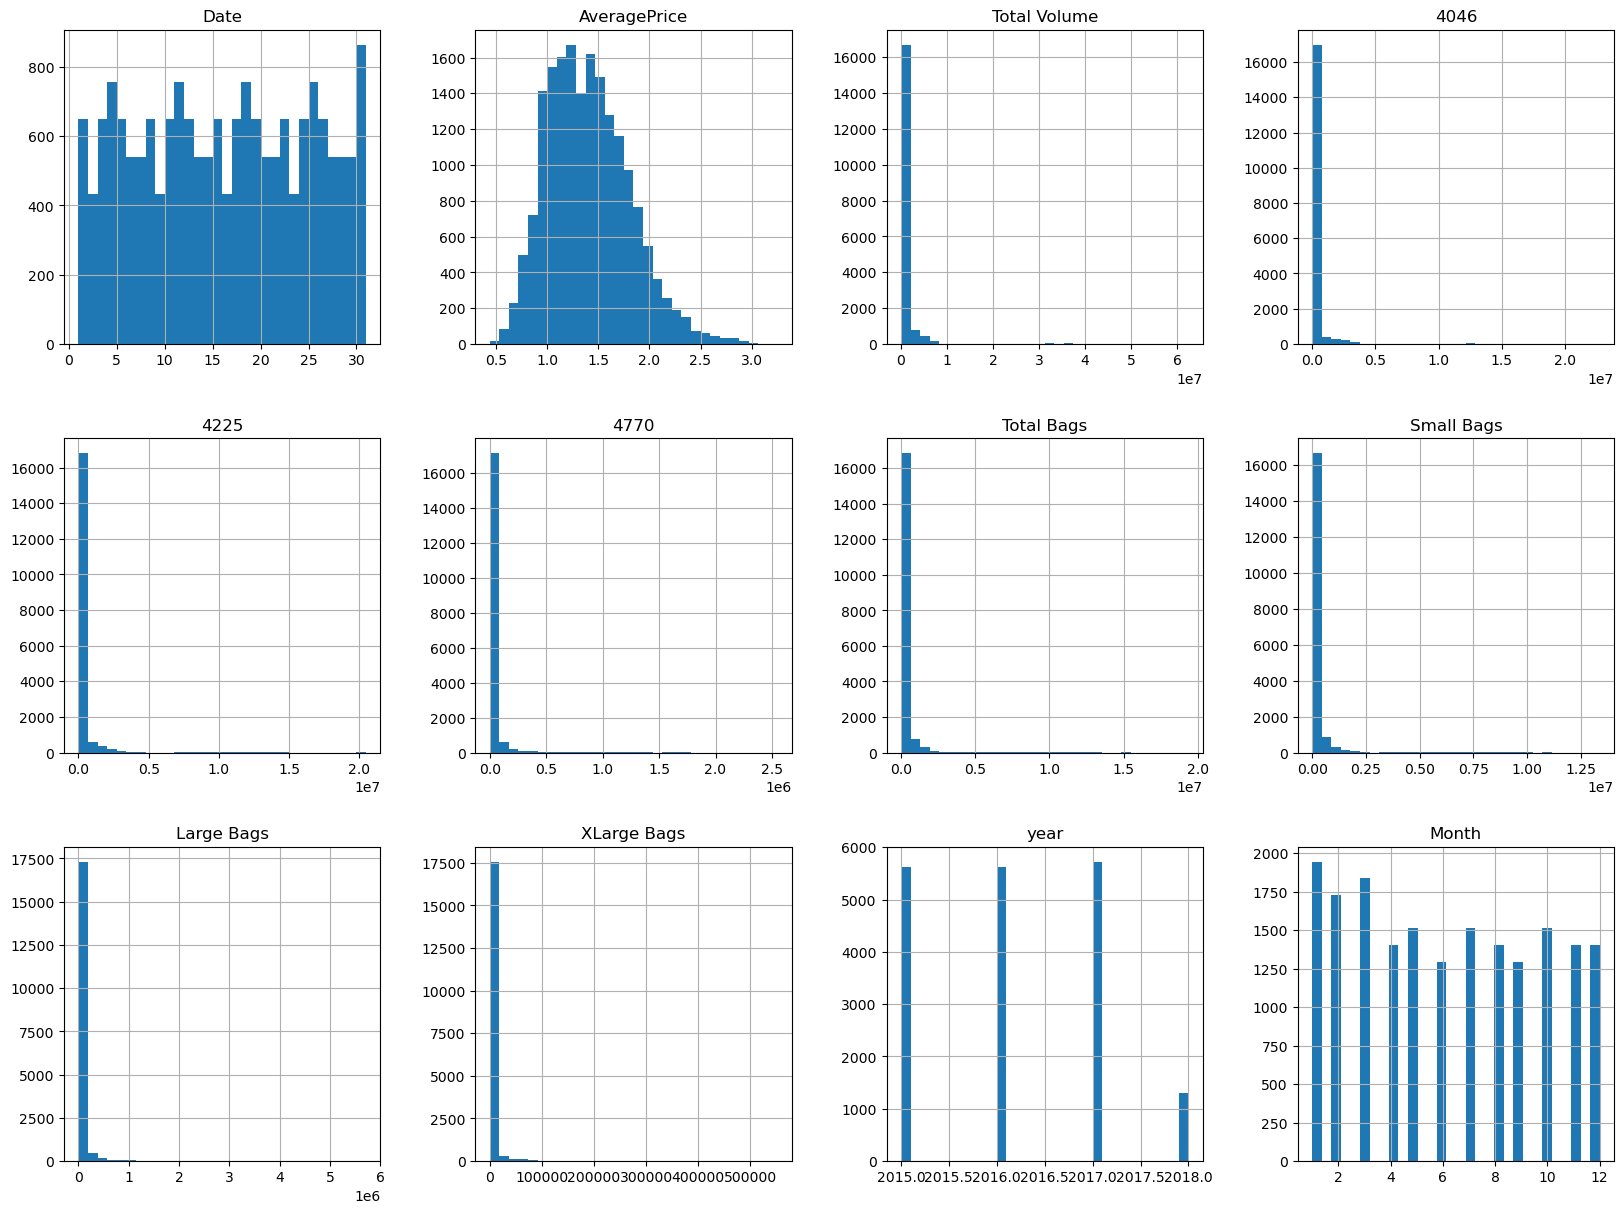

In [32]:
# Plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20, 20), grid=True, layout=(4, 4), bins=30)

In [33]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [34]:
#Making the categorical data into numercial for better EDA
column = ['type','region']
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))

print(df.dtypes)


Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
dtype: object


In [35]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [36]:
df.type  =df.type.astype(float)

Date               AxesSubplot(0.125,0.747241;0.168478x0.132759)
AveragePrice    AxesSubplot(0.327174,0.747241;0.168478x0.132759)
Total Volume    AxesSubplot(0.529348,0.747241;0.168478x0.132759)
4046            AxesSubplot(0.731522,0.747241;0.168478x0.132759)
4225               AxesSubplot(0.125,0.587931;0.168478x0.132759)
4770            AxesSubplot(0.327174,0.587931;0.168478x0.132759)
Total Bags      AxesSubplot(0.529348,0.587931;0.168478x0.132759)
Small Bags      AxesSubplot(0.731522,0.587931;0.168478x0.132759)
Large Bags         AxesSubplot(0.125,0.428621;0.168478x0.132759)
XLarge Bags     AxesSubplot(0.327174,0.428621;0.168478x0.132759)
type            AxesSubplot(0.529348,0.428621;0.168478x0.132759)
year            AxesSubplot(0.731522,0.428621;0.168478x0.132759)
region              AxesSubplot(0.125,0.26931;0.168478x0.132759)
Month            AxesSubplot(0.327174,0.26931;0.168478x0.132759)
dtype: object

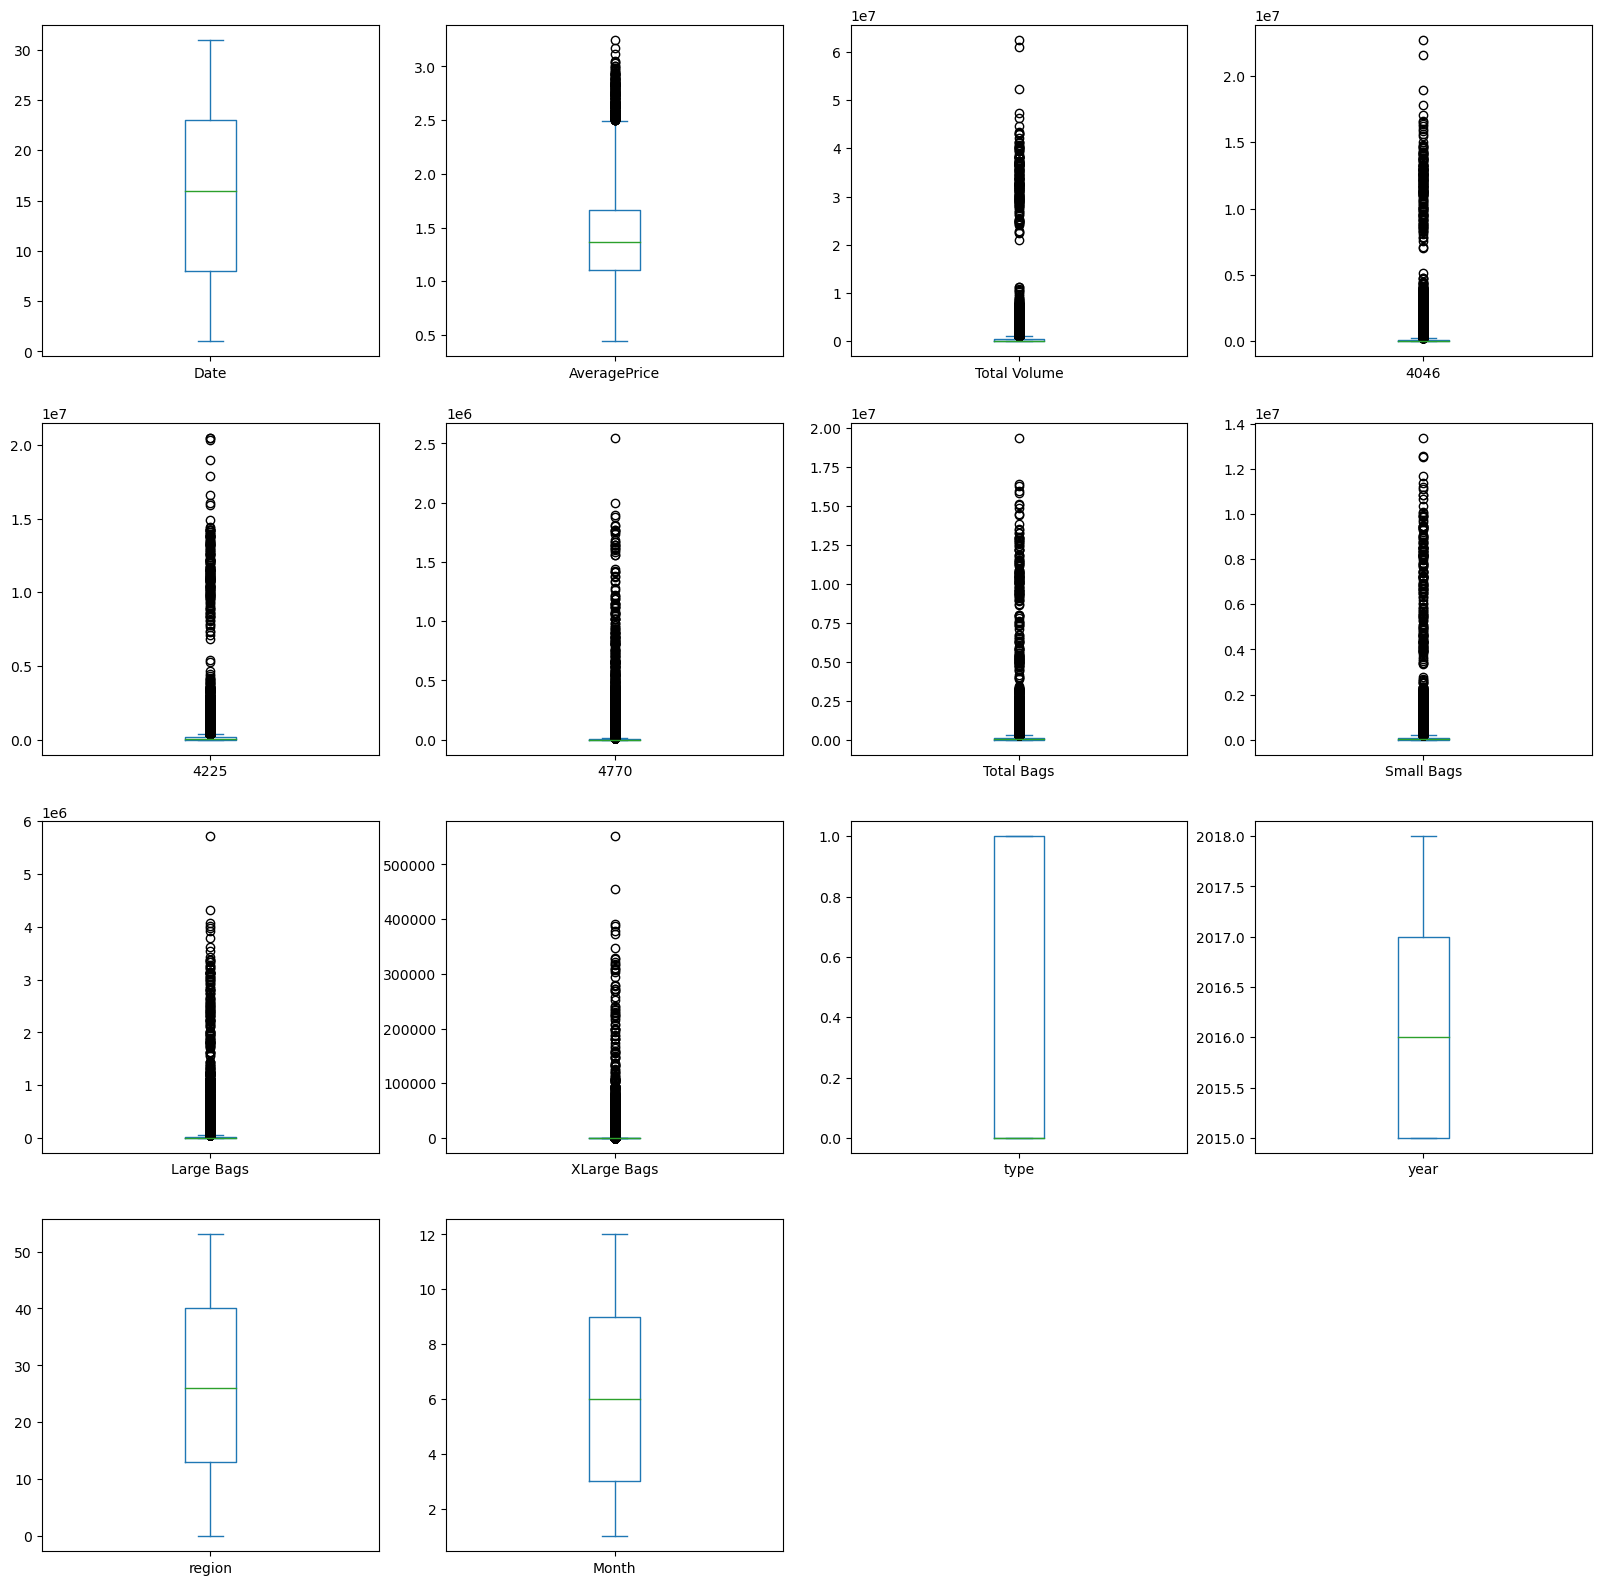

In [37]:
#plotting the boxplot of each column to check the outliers 
df.plot(kind='box',subplots = True,layout=(5,4),figsize = (20,25))

In [38]:
#calculate the zscore
z = np.abs(zscore(df))
print(z)

           Date  AveragePrice  Total Volume      4046      4225      4770  \
0      1.291857      0.188689      0.227716  0.230816  0.199902  0.212091   
1      0.494231      0.139020      0.230427  0.231103  0.208054  0.211997   
2      0.303396      1.182069      0.212085  0.231007  0.154478  0.211325   
3      1.101022      0.809551      0.223444  0.230741  0.185350  0.211864   
4      1.519750      0.312861      0.231538  0.230891  0.208719  0.211834   
...         ...           ...           ...       ...       ...       ...   
18244  1.328915      0.556347      0.241373  0.230017  0.243857  0.212540   
18245  1.405803      0.755023      0.242296  0.230693  0.242277  0.212540   
18246  0.608177      1.152375      0.242331  0.230693  0.243090  0.205766   
18247  0.189449      1.301382      0.241625  0.230428  0.242651  0.205774   
18248  0.987075      0.531512      0.241253  0.229347  0.243170  0.210450   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year 

[]

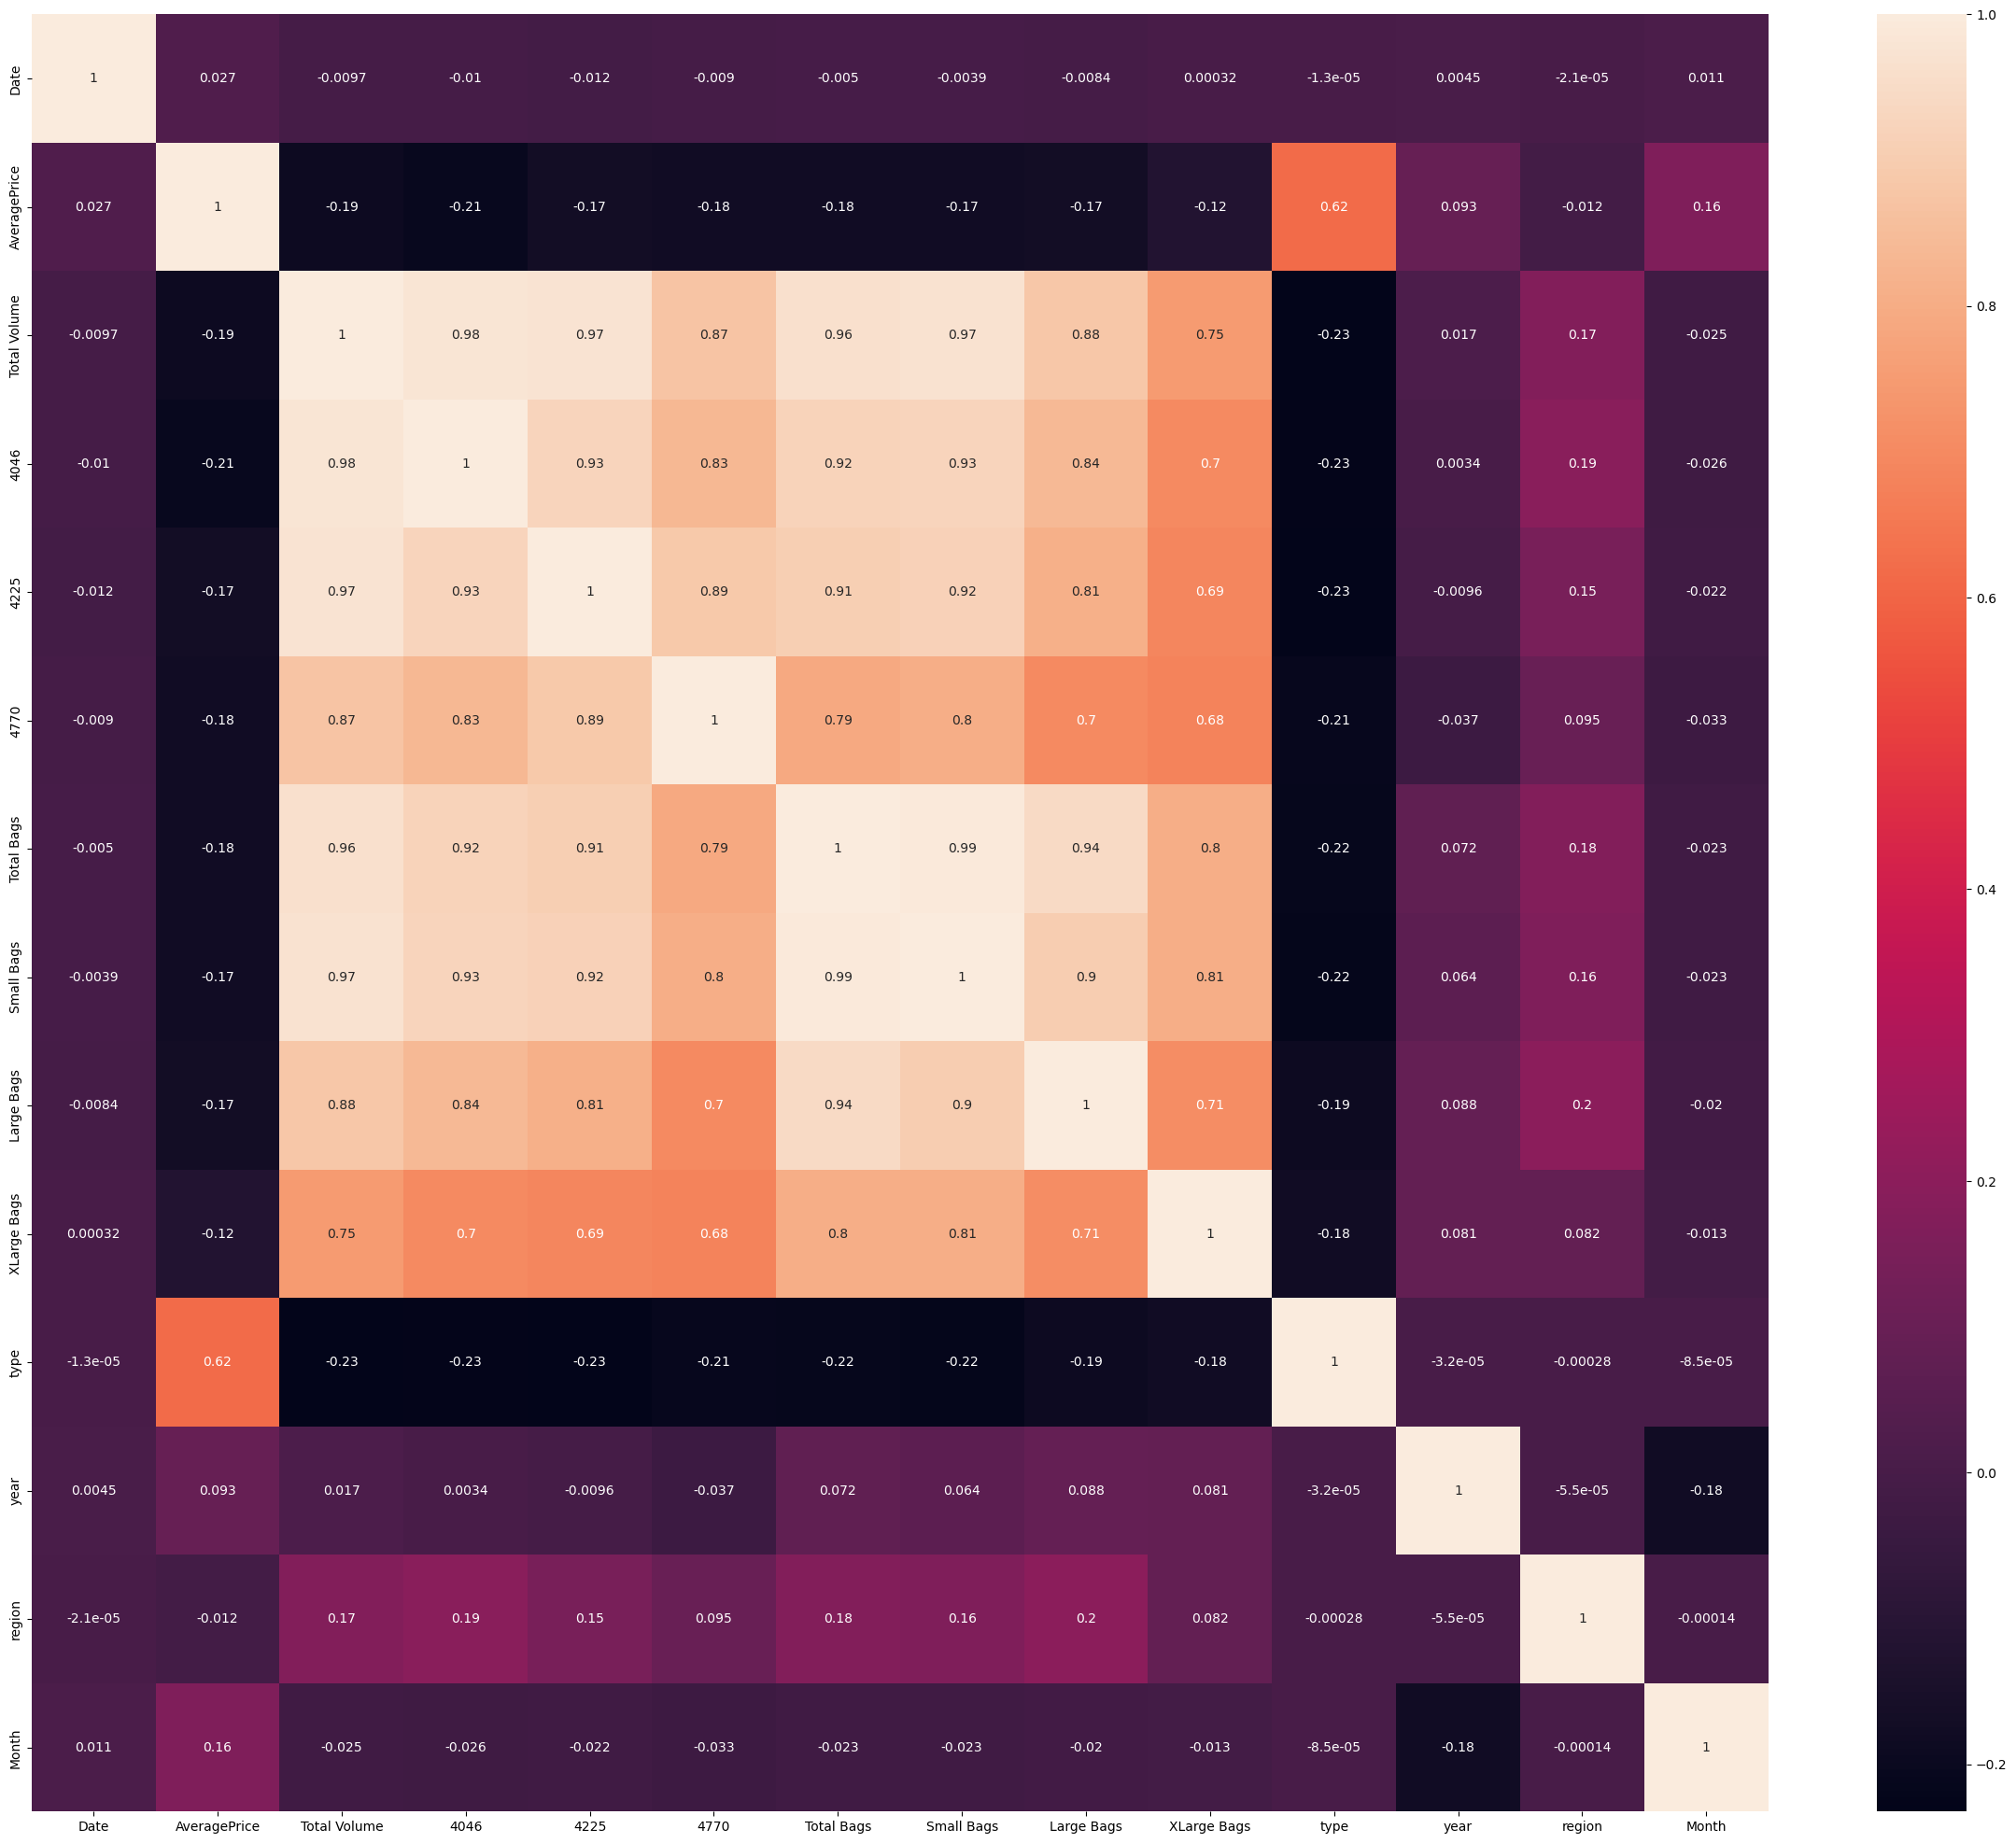

In [39]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

as year is most negative co related column among all columns and also the difference is very close of each column

In [40]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [41]:
#Assign the value to df_new which are less the threshold value and removing the outliers
df_new = df[(z<3).all(axis = 1)]

In [42]:
print(df.shape)
print(df_new.shape)
df = df_new
print('Shape after removing outlires',df.shape)

(18249, 14)
(17651, 14)
Shape after removing outlires (17651, 14)


In [43]:
#now finding the mean value of each column 
print(df['4225'].mean())
print(df['Total Bags'].mean())
print(df['Small Bags'].mean())

165600.94489433893
129816.01636961184
100628.33843918175


In [44]:
#replace the outlier value to its mean value to remove outliers
df.loc[df['4225']<3,'4225'] = np.mean(df['4225'])
df.loc[df['Total Bags']<4.8,'Total Bags'] = np.mean(df['Total Bags'])
df.loc[df['Small Bags']<4,'Small Bags'] = np.mean(df['Small Bags'])

Date               AxesSubplot(0.125,0.712609;0.133621x0.167391)
AveragePrice    AxesSubplot(0.285345,0.712609;0.133621x0.167391)
Total Volume     AxesSubplot(0.44569,0.712609;0.133621x0.167391)
4046            AxesSubplot(0.606034,0.712609;0.133621x0.167391)
4225            AxesSubplot(0.766379,0.712609;0.133621x0.167391)
4770               AxesSubplot(0.125,0.511739;0.133621x0.167391)
Total Bags      AxesSubplot(0.285345,0.511739;0.133621x0.167391)
Small Bags       AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Large Bags      AxesSubplot(0.606034,0.511739;0.133621x0.167391)
XLarge Bags     AxesSubplot(0.766379,0.511739;0.133621x0.167391)
type                AxesSubplot(0.125,0.31087;0.133621x0.167391)
year             AxesSubplot(0.285345,0.31087;0.133621x0.167391)
region            AxesSubplot(0.44569,0.31087;0.133621x0.167391)
Month            AxesSubplot(0.606034,0.31087;0.133621x0.167391)
dtype: object

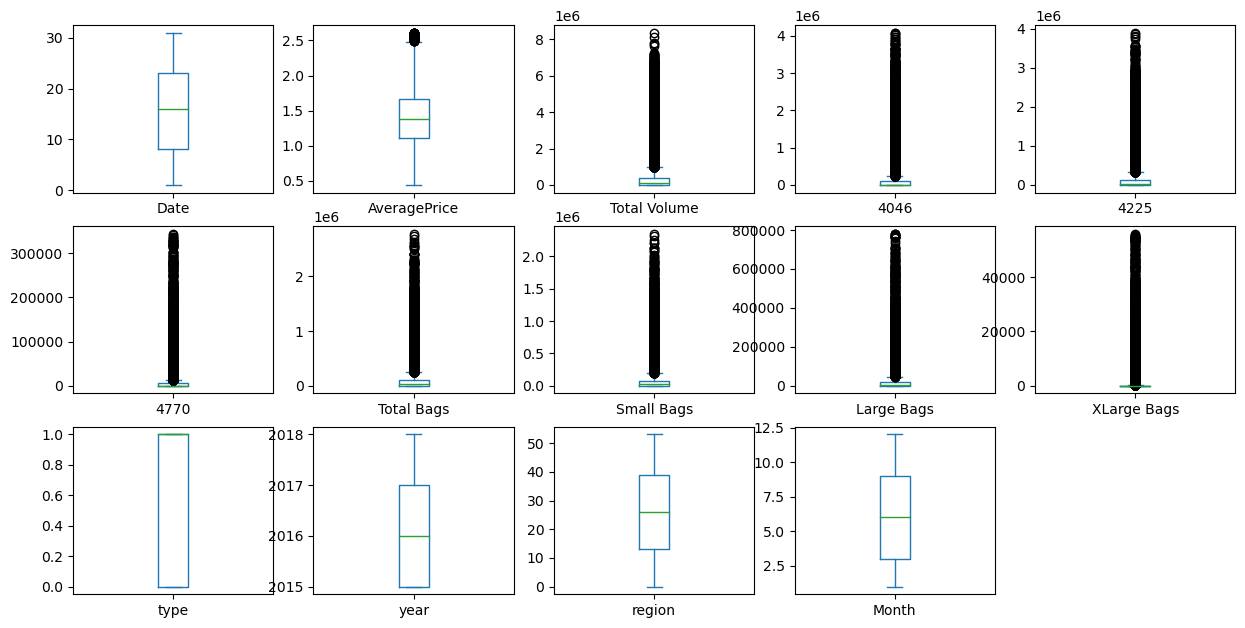

In [45]:
#plotting the boxplot of each column to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [46]:
print(df.shape)
print(df_new.shape)
df = df_new
print('Shape after removing outlires',df.shape)

(17651, 14)
(17651, 14)
Shape after removing outlires (17651, 14)


In [47]:
df.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455664
4770            5.117170
Total Bags      4.066780
Small Bags      4.222709
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

#I AM GOING TO ADJUST LESS OR EQUAL TO 0.55 FOR BETTER PREDICTION AND NORMAL PLOTTING



In [48]:

skew_cols = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

for col in skew_cols:
    if df[col].skew() > 0.55:
        df[col] = np.log1p(df[col])

# Now 'df' contains log-transformed values for columns with skewness > 0.55


In [49]:
df.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.503957
4770            0.068532
Total Bags     -0.319074
Small Bags     -0.435520
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero
In the last cell I am again checking the skewness value and there is difference between the first skewness value and second, now the skewness value of each column is near to zero.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

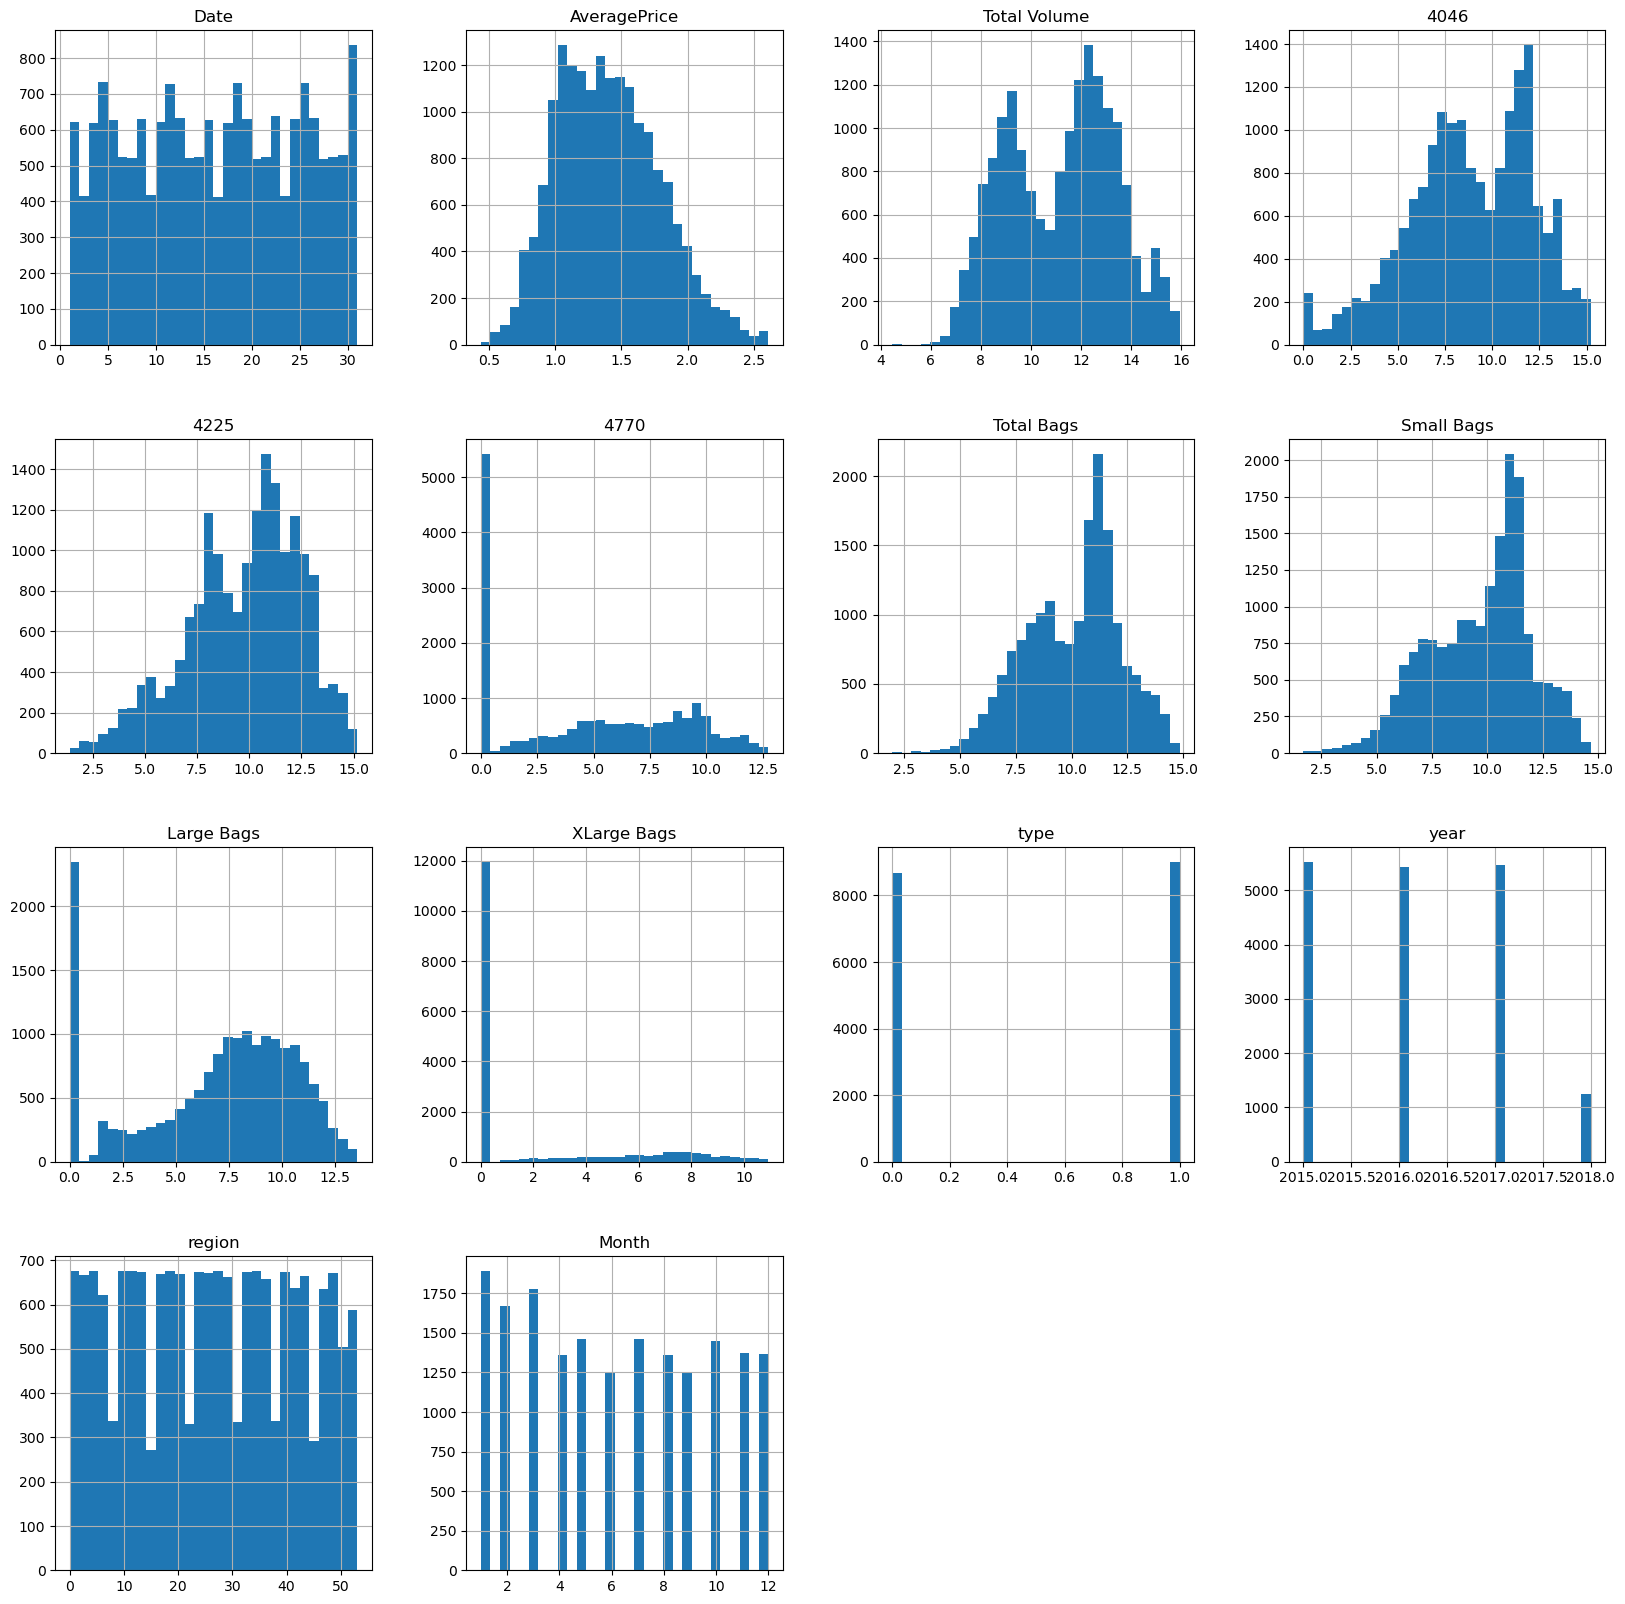

In [50]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

average price, total bags and total volume is well normally distributed data among all column



In [51]:
#assign the value of x and y for training and testing phase
x = df.drop(columns=['AveragePrice','Date'])
y = df[["AveragePrice"]]
print(x.shape)
print(y.shape)

(17651, 12)
(17651, 1)


Above we are using AveragePrice as output variable and used to do the prediction

In [52]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [54]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.30)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  40 is 0.7621509357196492
R2 score correspond to random state  40 is 0.8438206530586496
R2 score correspond to random state  40 is 0.5776950430987438
R2 score correspond to random state  40 is 0.5462488090015492
R2 score correspond to random state  40 is 0.7505973915301606
R2 score correspond to random state  41 is 0.7358093997318438
R2 score correspond to random state  41 is 0.8340650873036821
R2 score correspond to random state  41 is 0.537475365522379
R2 score correspond to random state  41 is 0.5363698739281373
R2 score correspond to random state  41 is 0.7470394634273065
R2 score correspond to random state  42 is 0.7362185251382563
R2 score correspond to random state  42 is 0.8322330294891154
R2 score correspond to random state  42 is 0.541545308949166
R2 score correspond to random state  42 is 0.5426420868998884
R2 score correspond to random state  42 is 0.7408857172539063
R2 score correspond to random state  43 is 0.7353783742619531
R2 score c

In [57]:
#Checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Assuming you have your training data as train_x and train_y
KN = KNeighborsRegressor()
parameters = {'n_neighbors': range(1, 30)}
gridsearch = GridSearchCV(KN, parameters)
gridsearch.fit(train_x, train_y)
print(gridsearch.best_params_)


{'n_neighbors': 2}


In [58]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 85.89267942392476


In [59]:
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error:  0.10055796827794561
Mean squared Error:  0.021017999433534742
Root Mean Absolute Error:  0.31710876411405853


Text(0, 0.5, 'Predicted_Y')

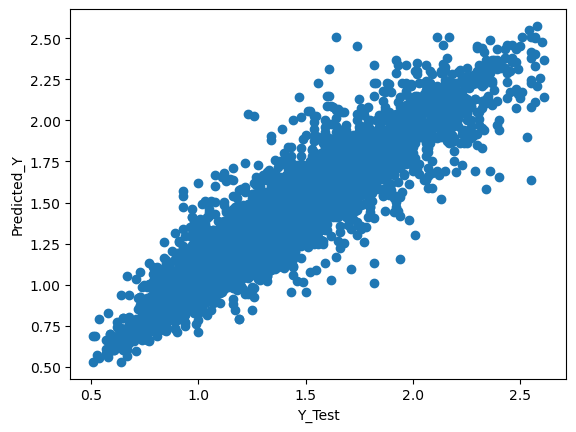

In [60]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

As above graph shown that it is predicting near to tha actual value and RMSE error is very less

In [61]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [62]:
#assign the value of x and y for training and testing phase
x_c = df.drop(columns=['region','Date'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

(17651, 12)
(17651, 1)


In [63]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

now we are taking region as output variable and try to prediction using classification method

In [65]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.30)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)
        

accuracy score correspond to random state  40 is 0.7909743202416919
accuracy score correspond to random state  40 is 0.7841767371601208
accuracy score correspond to random state  41 is 0.7775679758308157
accuracy score correspond to random state  41 is 0.7887084592145015
accuracy score correspond to random state  42 is 0.789463746223565
accuracy score correspond to random state  42 is 0.7841767371601208
accuracy score correspond to random state  43 is 0.7824773413897281
accuracy score correspond to random state  43 is 0.7832326283987915
accuracy score correspond to random state  44 is 0.7883308157099698
accuracy score correspond to random state  44 is 0.7847432024169184
accuracy score correspond to random state  45 is 0.785309667673716
accuracy score correspond to random state  45 is 0.7902190332326284
accuracy score correspond to random state  46 is 0.7966389728096677
accuracy score correspond to random state  46 is 0.7973942598187311
accuracy score correspond to random state  47 is 0

In [66]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 80,test_size = 0.30)
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [67]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

Accuracy Score : 84.74320241691842


In [68]:
#Calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  80.05164997431949
Mean Score      :  80.05164997431949
STD score       :  0.0


In [69]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [71]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.00615977 1.        ]


[0.        0.8019802 1.       ]


[2. 1. 0.]


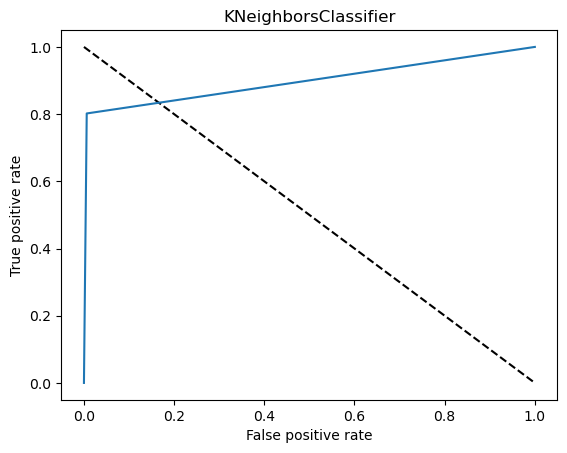

In [73]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()